Capstone Project 7
Task: Cluster the credit card users into different groups to find any meaningful patterns. Use Principal Component Analysis (PCA) to reduce the dimension of the feature space and then use the K-means algorithm to find clusters. Import relevant python libraries.

- Load dataset (CC GENERAL.csv, the name of the file when downloaded from Kaggle.)
- Check for null values and handle those values.
- Perform feature scaling using StandardScaler
- Perform PCA with all the columns and plot number of components vs PCA cumulative explained variance. From the plot identify the number of components required to cover 85% of the variance.
- Perform PCA with 2 principal components with the aim of visualizing clustering.
<!-- - Find the 2 columns which give the most covariances. -->
- Perform K Means Clustering on the 2 component PCA transformed data with clusters ranging from 2 to 11 and plot the K Means inertia against the number of clusters. (Elbow Method). From the elbow plot identify the ideal required number of clusters.
- Perform K Means Clustering on the 2 component PCA transformed data with the ideal number of clusters found in step 6
- Visualize the clusters on a scatter plot between 1st PCA and 2nd PCA component giving different colors to each cluster

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## First Stuff

In [16]:
df = pd.read_csv('./cc_general.csv')
df.head()
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [17]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.shape

(8950, 18)

In [26]:
df.dropna(subset="CREDIT_LIMIT", inplace=True, axis=0)

In [27]:
df.shape

(8949, 18)

In [31]:
df["MINIMUM_PAYMENTS"].fillna(0, inplace=True)
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- For null minimum payments, we replaced null values with 0
- We dropped the id column, which is an object type, as it doesn't add any contextual value and will make scaling more complex

In [ ]:
df = df.drop(columns=['CUST_ID'])

## Scaling and PCA

In [36]:
SS = StandardScaler()

In [38]:
df_scaled = SS.fit_transform(df)

In [43]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [56]:
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_sum)

[0.27299297 0.47619683 0.56444256 0.63924193 0.70129269 0.75861993
 0.80743981 0.85067561 0.88848756 0.91928847 0.94301416 0.96074838
 0.9750369  0.98720329 0.99732873 0.99999931 1.        ]


([<matplotlib.axis.XTick at 0x13f3ac610>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16')])

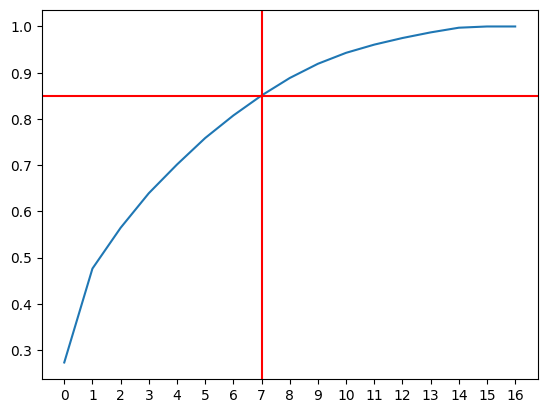

In [57]:
plt.plot(cumulative_sum)
plt.axhline(y=0.85, color="r")
plt.axvline(x=7, color="r")
plt.xticks(range(0, 17))

The number of components required to cover 85% of the variance is 8 (or the 7th index). 

## Reduce to 2 columns

In [73]:
pca_model = PCA(n_components=2)
# pca_model.fit(df_scaled)
scaled_data_pca = pca_model.fit_transform(df_scaled)
print(scaled_data_pca)

[[-1.68448288 -1.07021086]
 [-1.13256628  2.51027116]
 [ 0.96892604 -0.38341968]
 ...
 [-0.92989995 -1.80612242]
 [-2.33805747 -0.65098464]
 [-0.5583805  -0.40024709]]


## KMeans Clustering

### Determine Optimal Number of Clusters

In [68]:
k_values = range(2, 12)
wcss_list = []

# Test clusters from 2-11 to determine best number of clusters
for k in k_values:
    # Build a KMeans model based on each k value
    KM = KMeans(n_clusters=k, n_init=10)
    KM.fit(scaled_data_pca)

    # Calculate and append WCSS values
    wcss_value = KM.inertia_
    wcss_list.append(wcss_value)
    print(f"WCSS value: {wcss_value}")

WCSS value: 49688.886102446966
WCSS value: 33032.692457307654
WCSS value: 24552.207736744822
WCSS value: 19483.52123877654
WCSS value: 16240.401934161804
WCSS value: 13827.961664065759
WCSS value: 12332.117675165422
WCSS value: 10942.559611369586
WCSS value: 9901.568613950461
WCSS value: 8971.671878016488


Text(0, 0.5, 'WCSS')

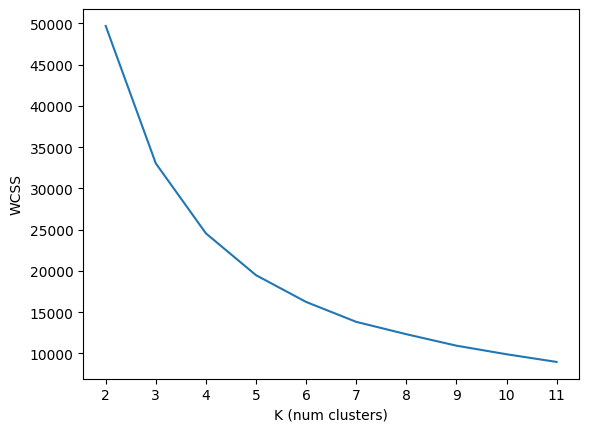

In [70]:
# Plot + Elbow Method
plt.plot(k_values, wcss_list)
plt.xticks(k_values)
plt.title('Elbow Method for K Means')
plt.xlabel('K (num clusters)')
plt.ylabel('WCSS')

Using the Elbow Method, we've determined that 7 clusters is the optimal number of clusters

### Perform Clustering on Optimal Number of Clusters

In [71]:
KM_model = KMeans(n_clusters=7, n_init=10)

In [75]:
my_clusters = KM_model.fit_predict(scaled_data_pca)

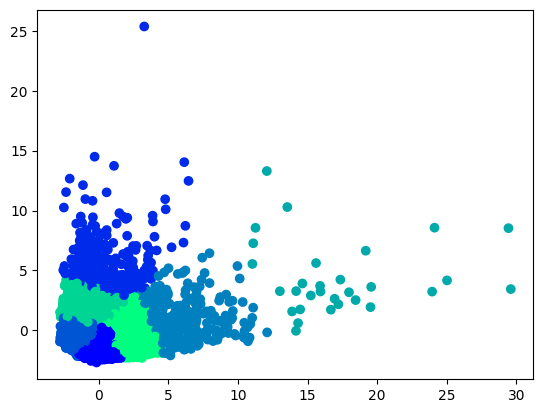

In [78]:
plt.scatter(scaled_data_pca[:, 0], scaled_data_pca[:, 1], c=my_clusters)